### Instructor Demo: Financial Forecasting Part III

This program executes `1000` simulations of stock price trajectory for `TSLA` and `SPHD` over the next `252 * 3` trading days (or 3 years of trading), based on a normal probability distribution of potential daily returns derived from the corresponding sample means and standard deviations. Daily and cumulative portfolio returns are then calculated, using `75%` of capital allocated to `TSLA` and `25%` of capital allocated to `SPHD`, to analyze the probability distribution and confidence interval of potential ending cumulative portfolio returns.

In [2]:
# Import libraries and dependencies


In [4]:
# Load .env enviroment variables


# Set Alpaca API key and secret





### Check Available Tickers from Alpaca Markets API

In [5]:
# Get all Asstes


# Keep only tradeable assets



[Asset({   'class': 'us_equity',
     'easy_to_borrow': False,
     'exchange': 'ARCA',
     'id': '02b6820c-e5d5-462f-b3d0-d600919dffd7',
     'marginable': True,
     'name': 'Direxion Daily Gold Miners Bull 3X Shares of Direxion Shares ETF '
             'Trust',
     'shortable': False,
     'status': 'active',
     'symbol': 'NUGT',
     'tradable': True}),
 Asset({   'class': 'us_equity',
     'easy_to_borrow': False,
     'exchange': 'NASDAQ',
     'id': 'd174dc71-0a75-47a7-a43c-5cf9360111bf',
     'marginable': True,
     'name': 'ETF Series Solutions Trust Loncar Cancer Immunotherapy ETF',
     'shortable': False,
     'status': 'active',
     'symbol': 'CNCR',
     'tradable': True}),
 Asset({   'class': 'us_equity',
     'easy_to_borrow': False,
     'exchange': 'NASDAQ',
     'id': '07844fc5-d49c-41dd-a543-dccaf6aec65c',
     'marginable': True,
     'name': 'Co-Diagnostics, Inc. Common Stock',
     'shortable': False,
     'status': 'active',
     'symbol': 'CODX',
     't

### Get 1 Year's Worth of Data via API Call and Read in as DataFrame 

In [6]:
# Set the list of tickers


# Set timeframe to '1D'


# Set start and end datetimes of 1 year, between now and 365 days ago.


# Get 1 year's worth of historical data for AAPL








SPHD                                     TSLA  \
                            open     high      low  close  volume    open   
2019-11-04 00:00:00-05:00  43.15  43.5194  43.1100  43.49  468854  314.80   
2019-11-05 00:00:00-05:00  43.41  43.5550  43.2400  43.35  428631  319.62   
2019-11-06 00:00:00-05:00  43.39  43.4960  43.1602  43.25  434993  318.00   
2019-11-07 00:00:00-05:00  43.44  43.4900  43.1800  43.25  575911  329.14   
2019-11-08 00:00:00-05:00  43.15  43.2600  42.9800  43.26  445627  334.50   

                                                               
                             high      low    close    volume  
2019-11-04 00:00:00-05:00  321.94  309.260  317.425   8579754  
2019-11-05 00:00:00-05:00  323.51  316.118  317.160   6308975  
2019-11-06 00:00:00-05:00  326.72  314.500  326.700   7748529  
2019-11-07 00:00:00-05:00  341.50  328.020  335.390  14148570  
2019-11-08 00:00:00-05:00  337.46  332.500  337.120   5966814

### Drop Extraneous Columns

In [7]:
# Use the `drop` function with the `level` parameter to drop extra columns in the multi-index DataFrame



,SPHD,TSLA
,close,close
2019-11-04 00:00:00-05:00,43.49,317.425
2019-11-05 00:00:00-05:00,43.35,317.160
2019-11-06 00:00:00-05:00,43.25,326.700
2019-11-07 00:00:00-05:00,43.25,335.390
2019-11-08 00:00:00-05:00,43.26,337.120


### Calculate Daily Returns

In [8]:
# Use the `pct_change` function to calculate daily returns of `TSLA` and `SPHD`.



,SPHD,TSLA
,close,close
2019-11-04 00:00:00-05:00,NaN,NaN
2019-11-05 00:00:00-05:00,-0.003219,-0.000835
2019-11-06 00:00:00-05:00,-0.002307,0.030079
2019-11-07 00:00:00-05:00,0.000000,0.026599
2019-11-08 00:00:00-05:00,0.000231,0.005158


### Calculate Value of Average Daily Returns

In [9]:
# Use the `mean` function to calculate the mean of daily returns for `TLSA` and `SPHD`, respectively





-0.003265788769029799

### Calculate Value of Standard Deviation of Daily Returns

In [10]:
# Use the `std` function to calculate the standard deviation of daily returns for `TSLA` and `SPHD`, respectively





0.029898069692506447

### Run the Monte Carlo Simulation and Save Results to DataFrame

In [11]:
# Set number of simulations and trading days



# Set last closing prices of `TSLA` and `SPHD`



# Initialize empty DataFrame to hold simulated prices for each simulation



# Run the simulation of projecting stock prices for the next trading year, `1000` times


    # Initialize the simulated prices list with the last closing price of `TSLA` and `SPHD`
    
    
    
    # Simulate the returns for 252 * 3 days
    
        
        # Calculate the simulated price using the last price within the list
        
        
        
        
        # Append the simulated price to the list
        
        
    
    # Append a simulated prices of each simulation to DataFrame
    
    
    
    # Calculate the daily returns of simulated prices
    
    
    # Set the portfolio weights (75% TSLA; 25% SPHD)
    

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
   
    
    # Calculate the normalized, cumulative return series
    

# Print records from the DataFrame



,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.981212,1.011225,1.012861,0.990767,0.980778,0.967030,0.988474,0.998204,0.964228,1.029432,...,0.968245,0.967419,0.931631,0.963437,1.037699,0.952018,1.025119,1.009061,0.968190,0.990369
2,0.945367,0.998894,0.992449,1.013188,1.008001,0.986696,0.911488,1.030948,0.933073,1.055832,...,0.970706,0.968538,0.912090,0.951503,1.020288,0.921226,1.045027,1.029699,0.937063,1.042623
3,0.951707,0.973876,1.001476,1.028396,1.055618,1.010836,0.944973,1.041408,0.921557,1.041604,...,0.969028,0.975017,0.881809,0.873111,1.009230,0.983572,1.074593,1.080008,0.919430,1.042407
4,0.927102,0.976823,1.038563,1.006241,1.060088,1.001311,0.963224,1.046300,0.867389,1.042873,...,1.018429,0.953366,0.877382,0.862974,0.982276,0.965778,1.027288,1.038846,0.899386,1.012097


### Plot the Multiple Simulations of Potential Cumulative Portfolio Returns over the Next 3 Years (252 * 3 Trading Days)

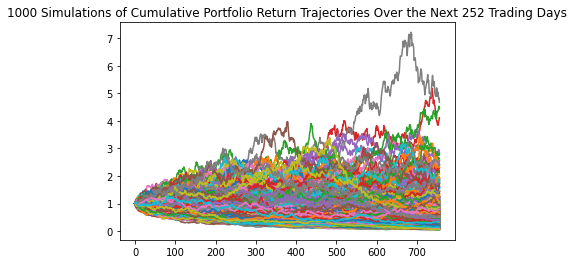

In [12]:
# Use the `plot` function to plot `1000` simulations of the potential trajectories of the portfolio based on 252 trading days



In [13]:
# Select the last row for project stock prices (prices of each simulation on the last trading day)



0    0.930713
1    0.179312
2    1.221326
3    0.562758
4    0.488303
Name: 756, dtype: float64

### Plot the Frequency Distribution of Simulated Ending Portfolio Cumulative Returns on the Last Trading Day

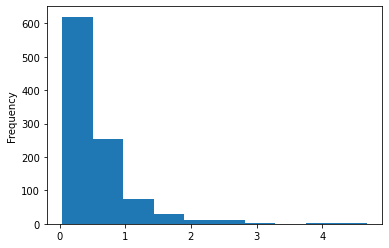

In [14]:
# Use the `plot` function to plot a frequency distribution of simulated ending prices



### Calculate the Probability Distribution of Ending Cumulative Return Ranges

In [15]:
# Use the `value_counts` function and the `len` function to calculate the probabilities of cumulative return ranges



(0.0368, 0.506]    0.620
(0.506, 0.969]     0.253
(0.969, 1.433]     0.073
(1.433, 1.896]     0.030
(2.359, 2.823]     0.010
(1.896, 2.359]     0.010
(4.213, 4.676]     0.002
(3.75, 4.213]      0.001
(2.823, 3.286]     0.001
(3.286, 3.75]      0.000
Name: 756, dtype: float64

### Calculate Lower and Upper Bounds of 95% Confidence Interval for Simulated Ending Cumulative Portfolio Returns

In [16]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending prices




0.025    0.099316
0.975    1.864628
Name: 756, dtype: float64

### Plot the Probability Distribution and 95% Confidence Interval of Simulated Ending Cumulative Portfolio Returns 

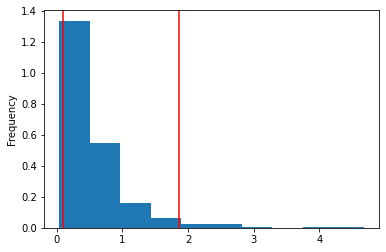

In [17]:
# Use the `plot` function to create a probability distribution histogram of simulated ending prices
# with markings for a 95% confidence interval






### Calculate 95% Confidence Interval of An Initial Investment of 10,000 in the Portfolio over the Next 3 Trading Years

In [18]:
# Set initial investment


# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns

                                                    
# Print the results



There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 252 * 3 trading days will end within in the range of $993.1620572982353 and $18646.27613631054


### Answer the Following Questions

* What is the expected range of projected cumulative returns of the given portfolio?
* What is the `95%` confidence interval of projected cumulative returns of the given portfolio?
* What is the `95%` confidence interval of projected cumulative investment for the given portfolio?

* The expected range of projected cumulative returns for the portfolio is between 0.671 and 0.833 with a 24.2% chance of occurring.
* The `95` confidence interval of projected cumulative returns is between 0.514393 and 1.570911.
* The `95` confidencc interval of projected cumulative investment is between 5143.93 and 15709.11.